In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import gc
import warnings
from joblib import dump, load
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [56]:
def load_data():
    data = pd.read_csv('Roman Urdu DataSet.csv', header=None)
    return data

In [33]:
roman_urdu_df= load_data()
roman_urdu_df.head()

,0,1,2
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,NaN
1,sahi bt h,Positive,NaN
2,"Kya bt hai,",Positive,NaN
3,Wah je wah,Positive,NaN
4,Are wha kaya bat hai,Positive,NaN


In [34]:
roman_urdu_df = roman_urdu_df.drop([2], axis=1)

In [35]:
roman_urdu_df.columns = ['Review', 'Sentiment']

In [36]:
roman_urdu_df.isnull().sum()

Review       1
Sentiment    0
dtype: int64

In [37]:
roman_urdu_df.dropna(inplace = True)

In [38]:
roman_urdu_df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [39]:
roman_urdu_df['Sentiment'].value_counts()

Neutral     8928
Positive    6013
Negative    5286
Neative        1
Name: Sentiment, dtype: int64

In [40]:
roman_urdu_df[roman_urdu_df['Sentiment'] == 'Neative']

,Review,Sentiment
13277,product achi hai but wrong waist size send kar...,Neative


In [41]:
roman_urdu_df.loc[roman_urdu_df['Sentiment']=='Neative', 'Sentiment'] = 'Negative'


In [42]:
df  = pd.DataFrame(roman_urdu_df[['Review', 'Sentiment']])
df.head(10)

,Review,Sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive
5,Wah kya baat likhi,Positive
6,Wha Itni sari khubiya,Positive
7,Itni khubiya,Positive
8,Ya allah rehm farma hm sab pe or zalimo ko hid...,Positive
9,Please Everyone AllAh S.w.T ka naam hAmesha Ba...,Positive


In [43]:
def remove_punct(text):
    text  = "".join([char for [char] in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def convert_to_lower_case(text):
    text  = "".join([char.lower() for [char] in text if char not in string.punctuation])
    return text


In [44]:
df['Sentence_Removal'] = df['Review'].apply(lambda x: remove_punct(str(x)))
df['Lower_Case'] = df['Sentence_Removal'].apply(lambda x: convert_to_lower_case(str(x)))
df.head()

,Review,Sentiment,Sentence_Removal,Lower_Case
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha ya her kisi kay bus ki bat nhi hai lak...
1,sahi bt h,Positive,sahi bt h,sahi bt h
2,"Kya bt hai,",Positive,Kya bt hai,kya bt hai
3,Wah je wah,Positive,Wah je wah,wah je wah
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,are wha kaya bat hai


In [45]:
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha',
           'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch',
           'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to','is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala',
           'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai',
           'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi',
           'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil',
           'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']

In [46]:
dictStopWords = {}
def removeStopWordss(text):
    text = re.sub('[^a-zA-Z]',' ',str(text))
    text = text.lower()
    wordList =str(text).split()
    for word in wordList:
        if word in stopwords:
            wordList.remove(word)
            if word not in dictStopWords:
                dictStopWords[word]= 1
            else:
                dictStopWords[word] = dictStopWords[word] + 1
    newSentence = " ".join(wordList)
    return (newSentence)

In [47]:
df['Sen_Out_StopWord'] = df['Lower_Case'].apply(lambda x: removeStopWordss(x))
df.head()

,Review,Sentiment,Sentence_Removal,Lower_Case,Sen_Out_StopWord
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha her kisi kay bus bat nhi lakin ki hal ...
1,sahi bt h,Positive,sahi bt h,sahi bt h,sahi bt h
2,"Kya bt hai,",Positive,Kya bt hai,kya bt hai,bt
3,Wah je wah,Positive,Wah je wah,wah je wah,wah je wah
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,are wha kaya bat hai,are wha kaya bat


In [48]:
import collections
from collections import Counter
dictGraph = {}
d = Counter(dictStopWords) # creating a counter
d.most_common(10)
for k,v in d.most_common(10):
    dictGraph[k] = v
dictGraph

{'ki': 5578,
 'ko': 3471,
 'ka': 3466,
 'hai': 3296,
 'se': 3110,
 'aur': 2629,
 'ne': 1948,
 'hain': 1536,
 'ho': 1514,
 'bhi': 1341}

In [49]:
def hashing(word):
    word = re.sub(r'ain$', r'ein', word)
    word = re.sub(r'ai', r'ae', word)
    word = re.sub(r'ay$', r'e', word)
    word = re.sub(r'ey$', r'e', word)
    word = re.sub(r'ie$', r'y', word)
    word = re.sub(r'^es', r'is', word)
    word = re.sub(r'a+', r'a', word)
    word = re.sub(r'j+', r'j', word)
    word = re.sub(r'd+', r'd', word)
    word = re.sub(r'u', r'o', word)
    word = re.sub(r'o+', r'o', word)
    word = re.sub(r'ee+', r'i', word)
    if not re.match(r'ar', word):
        word = re.sub(r'ar', r'r', word)
        word = re.sub(r'iy+', r'i', word)
        word = re.sub(r'ih+', r'eh', word)
        word = re.sub(r's+', r's', word)
    if re.search(r'[rst]y', 'word') and word[-1] != 'y':
        word = re.sub(r'y', r'i', word)
    if re.search(r'[bcdefghijklmnopqrtuvwxyz]i', word):
        word = re.sub(r'i$', r'y', word)
    if re.search(r'[acefghijlmnoqrstuvwxyz]h', word):
        word = re.sub(r'h', '', word)
        word = re.sub(r'k', r'q', word)
    return word

In [50]:
df['stem'] = df['Sen_Out_StopWord'].apply(lambda x: hashing(x))
df.head()

,Review,Sentiment,Sentence_Removal,Lower_Case,Sen_Out_StopWord,stem
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha her kisi kay bus bat nhi lakin ki hal ...,sae qa er qisi qay bos bat ni laqin qi al qal ...
1,sahi bt h,Positive,sahi bt h,sahi bt h,sahi bt h,sai bt
2,"Kya bt hai,",Positive,Kya bt hai,kya bt hai,bt,bt
3,Wah je wah,Positive,Wah je wah,wah je wah,wah je wah,wa je wa
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,are wha kaya bat hai,are wha kaya bat,are wa qaya bat


In [51]:
df.describe().transpose()

,count,unique,top,freq
Review,20228,19664,Good,23
Sentiment,20228,3,Neutral,8928
Sentence_Removal,20228,19593,,24
Lower_Case,20228,19528,good,32
Sen_Out_StopWord,20228,19363,,204
stem,20228,19263,,206


In [52]:
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator of K folds
    cv = KFold(n_splits=K, random_state=0, shuffle=True)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print("Mean score: %.3f (+/-%.3f)" % (np.mean(scores), sem(scores)))

In [53]:
def calc_params(X, y, clf, param_values, param_name, K):

    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))

    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})

        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)

        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)

        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1

        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])

    # plot the training and testing scores in a log scale
    plt.semilogx(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.semilogx(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

[0.64380599 0.65183812 0.63844252 0.64709518 0.6474042 ]
Mean score: 0.646 (+/-0.002)
svc__C = 1 Train = 0.8691910760787434 Test = 0.6457172037011792
svc__C = 5 Train = 0.9716042697368998 Test = 0.6154980862882928
svc__C = 10 Train = 0.9832838954239428 Test = 0.6112343450057718
svc__C = 50 Train = 0.9927697515490109 Test = 0.5855270086717508
svc__C = 100 Train = 0.9942528757031391 Test = 0.57990344949256
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  23.5s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  22.6s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  21.6s
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=  23.6s
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=  23.4s
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=  24.0s
[CV] END ...........................svc__C=1,

NameError: name 'accuracy_score' is not defined

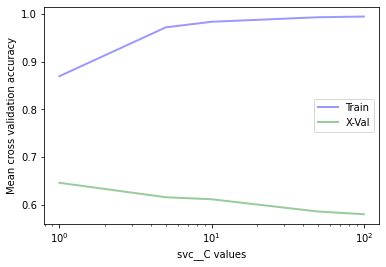

In [59]:
# Reading the sentences without the prediction feature.
#print(df)
features = df['stem']
# Only the column we want to predict
labels = df['Sentiment']

# dividing dataSet into training and testing with random state value
# 20% testing dataset and 80% training dataset
test_size = 0.2
seed = 11
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_size,
random_state=seed)

# import support vector classifier
# "Support Vector Classifier"


# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 3,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)
# Lets' set up a pipeline to perform preprocessng of the roman urdu data and
# classification of the documents using SVM
# Perform classification with SVM, kernel=linear

classifier_linear = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='linear')),
])
# SVM without tunning
# calling evaluate_cross_validation function to perform k fold cross validation on training dataset
# using SVM kernel = linear
evaluate_cross_validation(classifier_linear, x_train, y_train, 5)
# tunning parameter
c_vals = [1, 5, 10, 50, 100]

# calling calc_params function from above

train_scores, test_scores = calc_params(x_train, y_train, classifier_linear, c_vals, 'svc__C', 5)


parameters = {
    'svc__gamma': np.logspace(-3, 0, 4),
    'svc__C': [1, 5, 10, 50, 100],
}
# using kernel =rbf
clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='rbf')),
])
gs = GridSearchCV(clf, parameters, verbose=2, cv=3)
gs.fit(x_train, y_train)
gs.best_params_, gs.best_score_
# using kernel=rbf with C=100 and gamma = 0.01
classifier_rbf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='rbf', C=100, gamma=0.01)),
])
classifier_rbf.fit(x_train, y_train)
svc_pred = classifier_rbf.predict(x_test)

# Additional metric evaluations


Accuracy: 0.646
Precision: 0.644
Recall: 0.646
F1 Score: 0.644


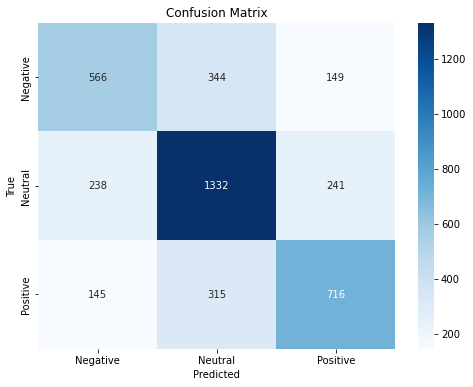

Classification Report:
              precision    recall  f1-score   support

    Negative       0.60      0.53      0.56      1059
     Neutral       0.67      0.74      0.70      1811
    Positive       0.65      0.61      0.63      1176

    accuracy                           0.65      4046
   macro avg       0.64      0.63      0.63      4046
weighted avg       0.64      0.65      0.64      4046



In [61]:
accuracy = accuracy_score(y_test, svc_pred)
precision = precision_score(y_test, svc_pred, average='weighted')
recall = recall_score(y_test, svc_pred, average='weighted')
f1 = f1_score(y_test, svc_pred, average='weighted')

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# Plot a confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, svc_pred))